# What is Linear Regression?

Imagine you’re a baby drag queen who’s only performed twice. 

One of your performances was a 1 minute song where you collected $10 in tips, 

Your other performance was a 3 minute song where you collected $30 in tips. 

### What is the relationship between performance length and tip amount? 

Let's plot this data and look for patterns.

In [337]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import math

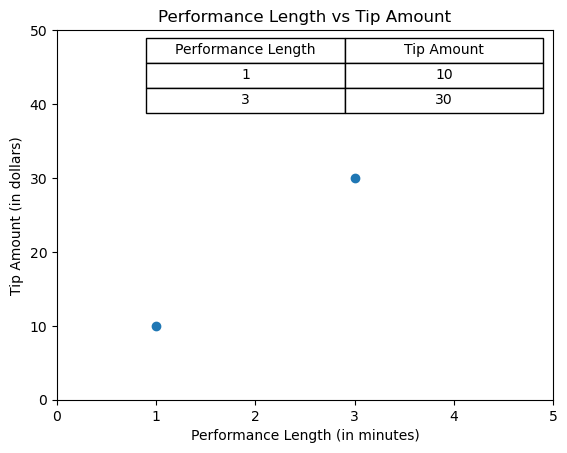

In [338]:
# Let's store the data in two variables,
# Let x represent the performance length, and 
# Let y represent the tip amount
x = np.array([1, 3])
y = np.array([10, 30])

# Plotting a new figure
plt.figure()
ax = plt.gca()
 
table = ax.table(cellText=[[1, 10], [3, 30]],
        colLabels=['Performance Length', 'Tip Amount'],
        cellLoc='center',
        loc="best")
table.set_fontsize(10)
table.scale(0.8, 1.5)


plt.scatter(x, y) 
plt.title("Performance Length vs Tip Amount")
plt.ylabel('Tip Amount (in dollars)')
plt.xlabel('Performance Length (in minutes)')
ax.set_xlim([0, 5])
ax.set_ylim([0, 50])
plt.show()


One pattern you might notice is that a shorter performance seems to mean fewer tips, and a longer performance seems to mean more tips. 

Statisticians call this a *positive correlation*. When one variable rises, the other one also rises.

#### What if your next performance was somewhere in the middle: a 2 minute song? 

How many tips could you expect to collect? 

Less than 10 dollars? 

Between 10 and 30? 

Or more than 30?

If you answered “between 10 and 30”, then you’ve just hypothesized a linear relationship. You've done linear regression in your head!

You probably connected the dots in your head with a straight line and reasoned that if the performance length was somewhere in the middle between 1 and 3, then the tip amount should also be somewhere in the middle between 10 and 30, at around 20 dollars.

Let's see that line on the graph, along with our hypothetical 2 minute performance.

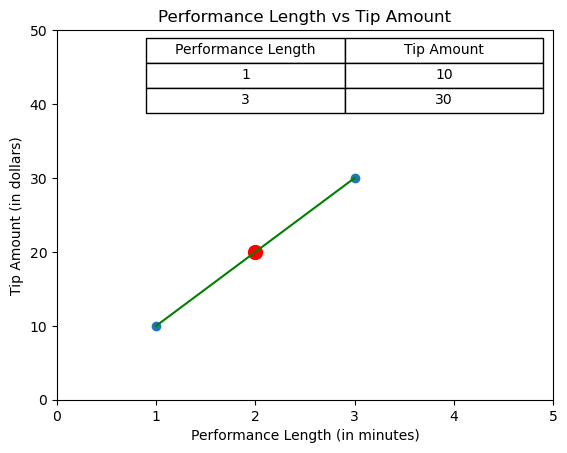

In [339]:
plt.figure()
ax = plt.gca()
table = ax.table(cellText=[[1, 10], [3, 30]],
        colLabels=['Performance Length', 'Tip Amount'],
        cellLoc='center',
        loc="best")
table.set_fontsize(10)
table.scale(0.8, 1.5)

plt.scatter(x, y) 
plt.title("Performance Length vs Tip Amount")
plt.ylabel('Tip Amount (in dollars)')
plt.xlabel('Performance Length (in minutes)')
ax.set_xlim([0, 5])
ax.set_ylim([0, 50])

# plotting the line fit
plt.plot(x, y, '-g')

# plotting a 2 minute song that gets 20 dollars
plt.scatter(2, 20, c='r', s=100)

# displaying the plot 
plt.show()

### That’s linear regression in action! 

Linear regression explores a possible linear relationship between our two variables, 

x = performance length, y = tip amount

By using data on your tips from the past to hypothesize your future tips, you're thinking like a statistician.

As you mature in your drag career, you may learn that tip amounts aren’t so predictable. Some nights your 2 minute song will get 20 dollars, and on other nights it’ll get 25. There’s some element of randomness that makes each performance different.

After 10 performances, your scatterplot might look like like this.

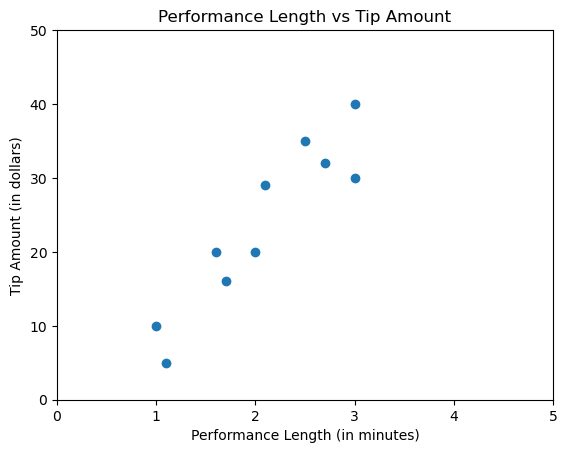

In [340]:
# Our new dataset after 10 performances
x_new = np.array([1, 3, 2, 1.7, 2.5, 2.7, 1.1, 1.6, 2.1, 3])
y_new = np.array([10, 30, 20, 16, 35, 32, 5, 20, 29, 40])

plt.scatter(x_new, y_new) 
plt.title("Performance Length vs Tip Amount")
plt.ylabel('Tip Amount (in dollars)')
plt.xlabel('Performance Length (in minutes)')
ax = plt.gca()
ax.set_xlim([0, 5])
ax.set_ylim([0, 50])
plt.show()

The data still resembles somewhat of a straight line, but it's no longer possible to draw a single line that passes through every point. Drawing the same line as we had before is sure to miss some points.


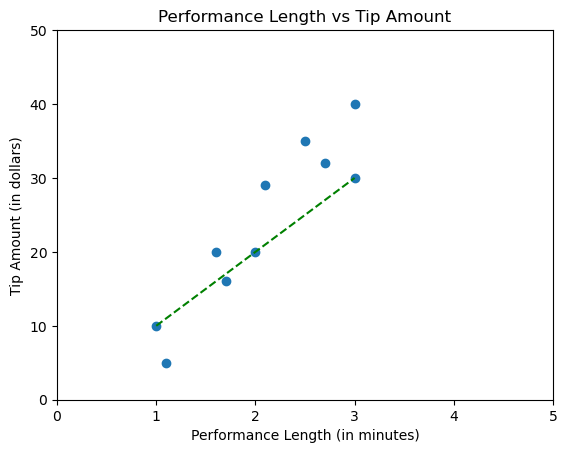

In [341]:
plt.plot(x, 10*x, '--g')
plt.scatter(x_new, y_new) 


plt.title("Performance Length vs Tip Amount")
plt.ylabel('Tip Amount (in dollars)')
plt.xlabel('Performance Length (in minutes)')
ax = plt.gca()
ax.set_xlim([0, 5])
ax.set_ylim([0, 50])
plt.show()

The goal of linear regression is to draw a line of "best fit". That is, a line that best represents the overall trend, by being as close as possible to all the data points. 

Let's update the plot with a line that fits better.

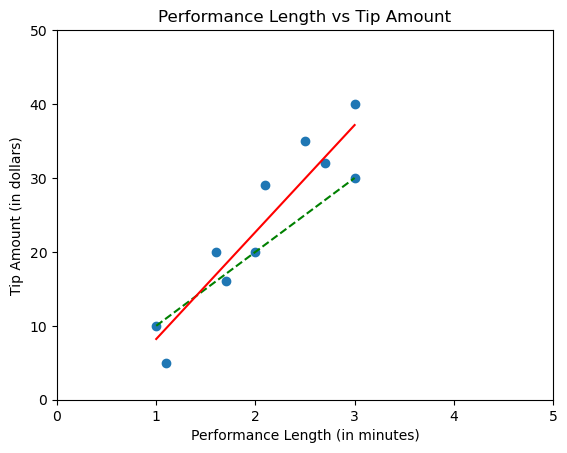

In [342]:
plt.plot(x, 10*x, '--g')
plt.scatter(x_new, y_new) 

plt.title("Performance Length vs Tip Amount")
plt.ylabel('Tip Amount (in dollars)')
plt.xlabel('Performance Length (in minutes)')
ax = plt.gca()
ax.set_xlim([0, 5])
ax.set_ylim([0, 50])


# Plotting the line of best fit
m, b = np.polyfit(x_new, y_new, 1)
plt.plot(x, m*x+b, '-r')


plt.show()

## Finding the line of best fit is the goal of linear regression.

Imagine that this dataset actually represents a totally different scenario, like a baby's head circumference and gestational age, or the number of cars on the road and the rate of car accidents, or a person's salt consumption and blood pressure.

The role of a statistician is to develop a model that represents broad patterns in the data, and use that model to make useful predictions.

We want to draw the best possible line of best fit, to make the model as accurate as possible!

By "model", I'm referring to our line of best fit. That's our model! By fitting it to our dataset, we're "training" it on past data, and we can use it to extrapolate to future performances. That's why linear regression may be considered a form of machine learning!

### But how do we find the line of best fit? 

How do we know that the solid red line is a better fit than the dashed green line? What if it was possible to draw an even better line?

It would be great if there was a numerical "measure" we could use to rank how good each line is, so we could compare the two.

To rank how well a line fits the data, you could look at all the data points which are *not* on the line, and then measure how far away from the line they are.

We call this a *loss function*, because it measures how much our line misses the data points.

## Sum of Squares of Errors

To measure how well or how poorly our line fits the data, we might start by adding up the distances between each data point and the line. 

The data points are represented by y, and the equation of the line is mx + b. 

Some data points will be above the line and others will be below, but we don't want the positive and negative distances to cancel each other out, so we'll square each distance to keep it non-negative, and then add up all these distances.

We call this equation the Sum of Squares of Errors

$$
  \text{SSE} = \sum_{i=1}^{n} \left( y_i - (mx_i + b) \right)^2
$$

Let's compute the SSE of the dashed green line.

Sum of Squares of Errors (SSE): 342.0


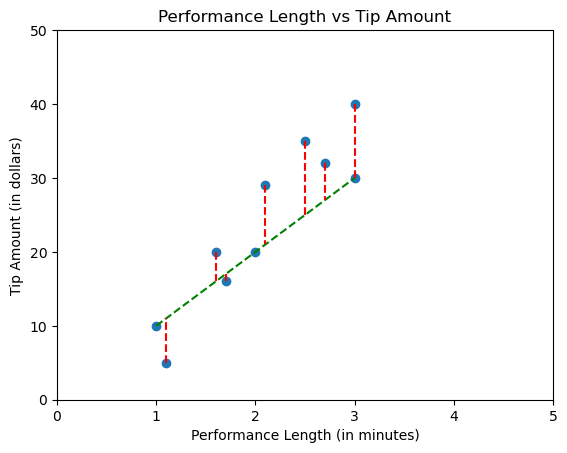

In [343]:
# the green line
plt.plot(x, 10*x, '--g')

# Plot vertical lines from each point to the line
for i in range(len(x_new)):
    plt.plot([x_new[i], x_new[i]], [y_new[i], 10*x_new[i]], 'r--')

# Calculate SSE
errors = y_new - 10*x_new
sse = np.sum(errors**2)
print(f'Sum of Squares of Errors (SSE): {sse}')

# Plot the points again
plt.scatter(x_new, y_new) 
plt.title("Performance Length vs Tip Amount")
plt.ylabel('Tip Amount (in dollars)')
plt.xlabel('Performance Length (in minutes)')
ax = plt.gca()
ax.set_xlim([0, 5])
ax.set_ylim([0, 50])

plt.show()

The dashed red lines represent the errors, and we square each one to keep it from being negative, and add them all up.

We get SSE = 342. How well does our other line do?

Sum of Squares of Errors (SSE): 156.70699432892243


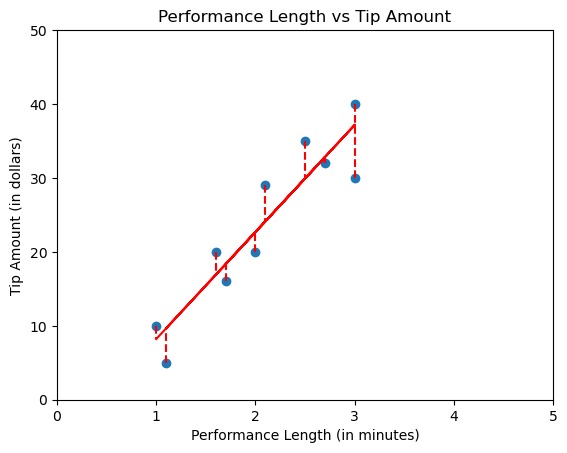

In [344]:
# The red line
m, b = np.polyfit(x_new, y_new, 1)
plt.plot(x_new, m*x_new+b, '-r')

# Plot vertical lines from each point to the line
for i in range(len(x_new)):
    plt.plot([x_new[i], x_new[i]], [y_new[i], m*x_new[i] + b], 'r--')

# Calculate SSE
errors = y_new - (m*x_new + b)
sse = np.sum(errors**2)
print(f'Sum of Squares of Errors (SSE): {sse}')

# Plot the points
plt.scatter(x_new, y_new) 
plt.title("Performance Length vs Tip Amount")
plt.ylabel('Tip Amount (in dollars)')
plt.xlabel('Performance Length (in minutes)')
ax = plt.gca()
ax.set_xlim([0, 5])
ax.set_ylim([0, 50])

plt.show()

### The SSE is now 156.71, which is way better!

But how do we know this is the *best* possible line we can get? Is it possible to get this SSE even smaller?

### Sounds like calculus!

In calculus class, you may have learned about finding the minimum of a function, by taking the derivative and solving for when the derivative equals zero. 

Let's look at the formula for SSE again:

$$
  \text{SSE} = \sum_{i=1}^{n} \left( y_i - (mx_i + b) \right)^2
$$

In this equation, we can't control the values of $y_i$ and $x_i$, but we *can* control the parameters $m$ and $b$.

So SSE is really a function of two variables: $m$ and $b$. That means we can't plot it as a line, but rather as a surface in a 3D plot! How exciting!

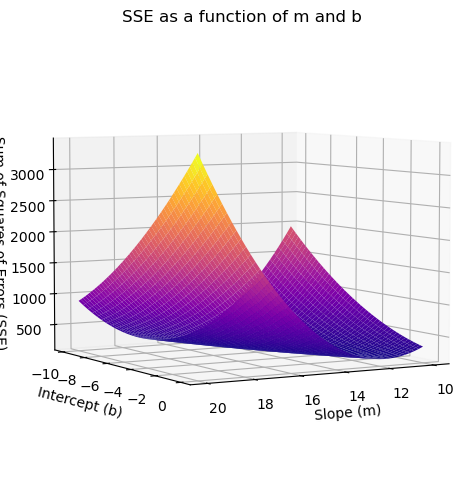

In [345]:
from mpl_toolkits.mplot3d import Axes3D

# Define a range of m and b values
m_values = np.linspace(10, 20, 50)
b_values = np.linspace(-10, 0, 50)

# Create a grid of m and b values
M, B = np.meshgrid(m_values, b_values)

# Calculate SSE for each pair (m, b)
SSE = np.zeros_like(M)
for i in range(len(m_values)):
    for j in range(len(b_values)):
        errors = y_new - (M[j, i] * x_new + B[j, i])
        SSE[j, i] = np.sum(errors**2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, SSE, cmap='plasma')

# Reorient the plot
ax.view_init(elev= 5, azim=60)

# Adjust layout
plt.tight_layout()

# Labels and title
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Sum of Squares of Errors (SSE)')
ax.set_title('SSE as a function of m and b')

plt.show()

To find the minimum value of SSE, we can take the partial derivates of the SSE function with respect to $m$ and $b$, and that's how we can find the line of best fit!

### Now you have a better understanding of what linear regression is all about. 

After perfecting your model,  maybe you get cocky and start performing really long songs to get as many tips as possible, but you find that your tips don’t get much better. After the 3rd chorus, you've collected as many tips as you're going to get, so your line starts to plateau.


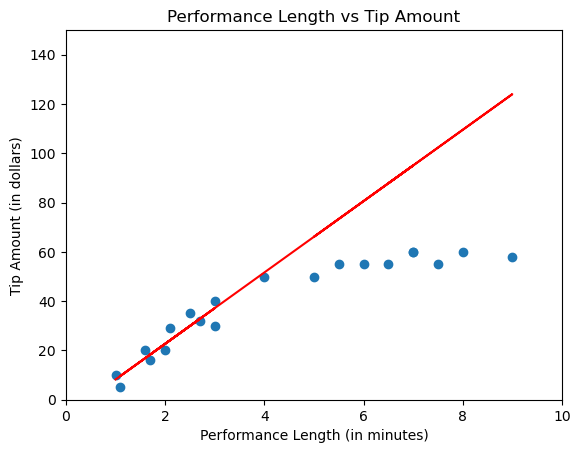

In [346]:
# Our new dataset after 20 performances
x_20 = np.array([1, 3, 2, 1.7, 2.5, 2.7, 1.1, 1.6, 2.1, 3, 4, 6, 7, 6.5, 8, 9, 7.5, 5, 5.5, 7])
y_20 = np.array([10, 30, 20, 16, 35, 32, 5, 20, 29, 40, 50, 55, 60, 55, 60, 58, 55, 50, 55, 60])

plt.scatter(x_20, y_20) 
plt.title("Performance Length vs Tip Amount")
plt.ylabel('Tip Amount (in dollars)')
plt.xlabel('Performance Length (in minutes)')
ax = plt.gca()
ax.set_xlim([0, 10])
ax.set_ylim([0, 150])

plt.plot(x_20, m*x_20+b, '-r')
plt.show()

In light of this new information, our previous line of best fit doesn't look like it fits very well anymore. 

Maybe you decide you want to update your model and draw a new line. 

Perhaps you decide that the new model should actually be a curve, instead of a straight line.

Or, maybe you want to add more variables, because you think that your tips might also affected by the day of the week and the size of the audience, and the type of performance (ballad, dance, comedy).

All of these are things we can add to our linear regression model. With the single variable (performance length), the model is called $simple linear regression$. If we use multiple variables (performance length, day of the week, audience size, performance type), it's called $multiple linear regression$. If we want to plot all of this a scatterplot, we would need a 5-dimensional plot!

Sadly, there aren't enough dimensions in our universe. But we can still use linear regression, even if we can't visualize the line of best fit anymore! That's why we eventually have to rely on numerical measures like SSE to tell us when a line is a good fit -- we can't see a line in 5 dimensions!

You might be thinking, "all of this just for some tip money at a drag show?"

Well, yes!

Even when the data gets complex, statistics can rise to meet the challenge. When our models are good, our predictions are good. And by minimizing the errors, we can make important and useful predictions, in matters of health care, public policy, life, death, and drag.